# Travailler avec des dates formatées de manière non standard

### Données météorologiques de MétéoSuisse en Open Data

Signification des noms de colonnes:

```
tre200d0             °C               température de l'air à 2 m du sol; moyenne journalière
tre200dn             °C               température de l'air à 2 m du sol; minimum journalier 
tre200dx             °C               température de l'air à 2 m du sol; maximum journalier
```

In [1]:
import pandas as pd

# matplotlib permet de générer des graphiques
import matplotlib.pyplot as plt

# on affiche les graphiques dans le notebook directement
%matplotlib inline

In [2]:
df = pd.read_csv("data/data_GVE.csv")
df.head()

,station/location,date,tre200d0,tre200dn,tre200dx,year
0,GVE,19500101,NaN,NaN,NaN,1950
1,GVE,19500102,NaN,NaN,NaN,1950
2,GVE,19500103,NaN,NaN,NaN,1950
3,GVE,19500104,NaN,NaN,NaN,1950
4,GVE,19500105,NaN,NaN,NaN,1950


### Préciser le format de date
On utilise les symboles suivants, précédés d’un `%`:
* `Y` pour l’année en 4 chiffres, par exemple 2020
* `%m` pour le mois en deux chiffres, par exemple 03 ou 11
* `%d` pour le jour en deux chiffres, par exemple 09 ou 23

In [9]:
df.index = pd.to_datetime(df["date"], format="%Y%m%d")

<Axes: xlabel='date'>

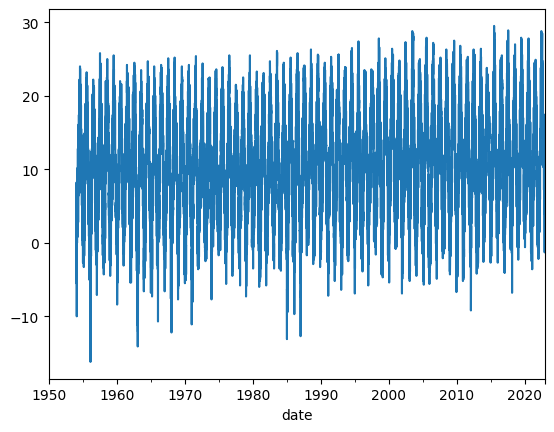

In [10]:
# Moyenne journalière: on ne voit rien
df["tre200d0"].plot()

<Axes: xlabel='date'>

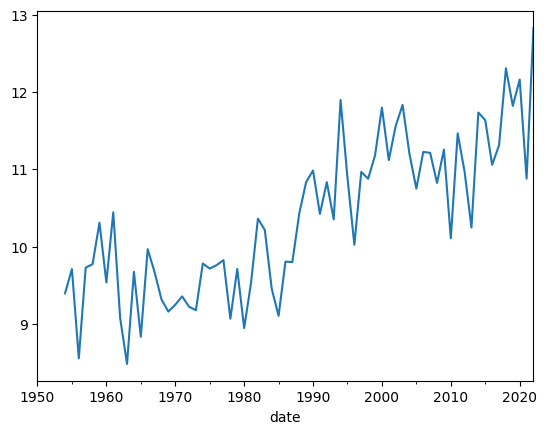

In [13]:
# Calculer la moyenne annuelle
df["tre200d0"].resample("A").mean().plot()

In [20]:
# 12 derniers mois
df[df.index.year > 2021]["tre200d0"].resample("M").mean()

date
2022-01-31     1.990323
2022-02-28     5.064286
2022-03-31     7.364516
2022-04-30    10.310000
2022-05-31    17.554839
2022-06-30    21.220000
2022-07-31    23.600000
2022-08-31    22.316129
2022-09-30    15.940000
2022-10-31    14.661290
2022-11-30     8.243333
2022-12-31     5.090323
Freq: M, Name: tre200d0, dtype: float64

<Axes: xlabel='date'>

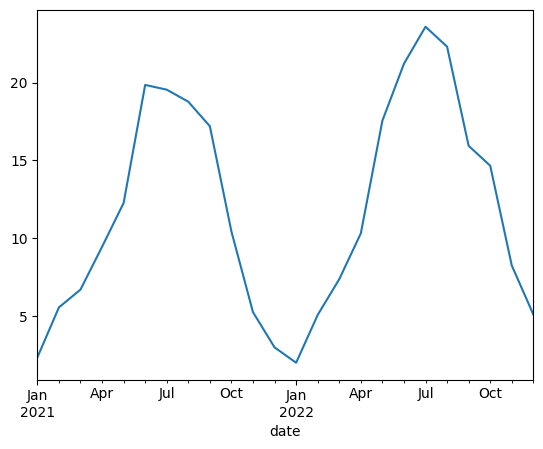

In [19]:
# 24 derniers mois, en graphique
df[df.index.year > 2020]["tre200d0"].resample("M").mean().plot()

In [23]:
# 10 dernières semaines avec .tail()
df["tre200d0"].resample("W").mean().tail(10)

date
2022-10-30    13.614286
2022-11-06     9.814286
2022-11-13     9.971429
2022-11-20     9.228571
2022-11-27     5.500000
2022-12-04     5.228571
2022-12-11     1.571429
2022-12-18     1.685714
2022-12-25     9.285714
2023-01-01     8.700000
Freq: W-SUN, Name: tre200d0, dtype: float64

<Axes: xlabel='date'>

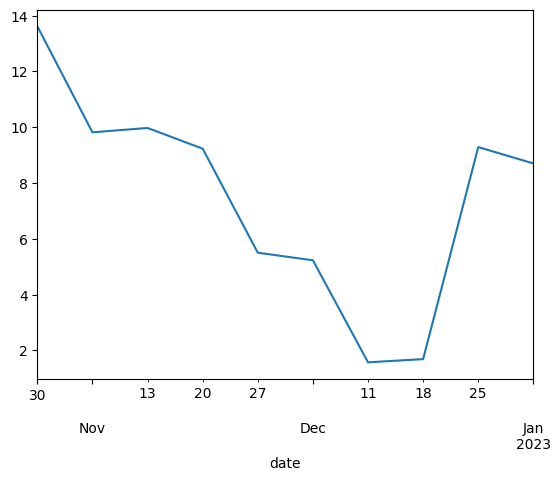

In [24]:
# 10 dernières semaines, sous forme de graphique
df["tre200d0"].resample("W").mean().tail(10).plot()